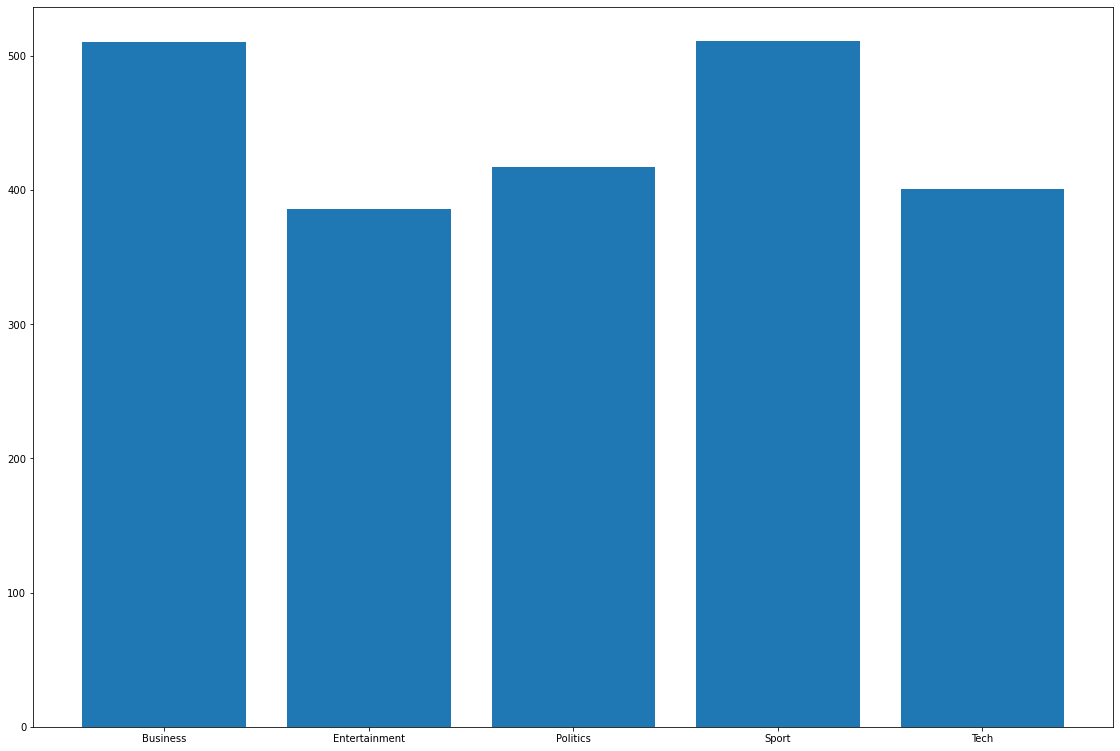

In [1]:
#step 2

import matplotlib.pyplot as plt
import os

number_per_category = []
DIR = 'BBC/business'
files = os.listdir(DIR)
number_per_category.append(len(files))

DIR = 'BBC/entertainment'
files = os.listdir(DIR)
number_per_category.append(len(files))

DIR = 'BBC/politics'
files = os.listdir(DIR)
number_per_category.append(len(files))

DIR = 'BBC/sport'
files = os.listdir(DIR)
number_per_category.append(len(files))

DIR = 'BBC/tech'
files = os.listdir(DIR)
number_per_category.append(len(files))

fig = plt.figure(figsize=(15,10))
ax = fig.add_axes([0,0,1,1])
plt.axis("on")
langs = ['Business', 'Entertainment', 'Politics', 'Sport', 'Tech']
ax.bar(langs,number_per_category)
plt.show()
fig.savefig("BBC-distribution.pdf",bbox_inches='tight', dpi=150);

In [2]:
#step 3
import sklearn.datasets
dataset = sklearn.datasets.load_files("BBC", encoding="latin1", decode_error='strict')

In [3]:
#step 4
import sklearn.model_selection
from sklearn.feature_extraction.text import TfidfTransformer,CountVectorizer

count_vect = CountVectorizer()
term_document_matrix = count_vect.fit_transform(dataset.data)

In [4]:
#step 5
x_train,x_test,y_train,y_test = sklearn.model_selection.train_test_split(term_document_matrix, dataset.target,test_size=0.2, random_state=None)

In [5]:
#step 6
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(x_train, y_train)

import numpy as np
predicted = clf.predict(x_test)
np.mean(predicted == y_test)



0.9775280898876404

In [6]:
with open('bbc-performance.txt', 'a') as f:
    f.write("(a) ************** Multi-nomialNB default values, try 1")

In [7]:
#step 7

import math

#b)
confusion = sklearn.metrics.confusion_matrix(y_test, predicted)

#c)
report = sklearn.metrics.classification_report(y_test, predicted,target_names=dataset.target_names)

#d)
accuracy = sklearn.metrics.accuracy_score(y_test, predicted)
macro_average = sklearn.metrics.f1_score(y_test, predicted, average="macro")
weighted_average = sklearn.metrics.f1_score(y_test, predicted, average="weighted")

#e)

total_documents = len(x_train.toarray())

priors = [0,0,0,0,0]
for i in range (0,5):
    priors[i] = clf.class_count_[i]
    
for i in range (0,len(priors)):
    priors[i] /= total_documents
#f)
vocab_size = len(count_vect.get_feature_names())

#g)
word_token_per_class = {}
for category in dataset.target_names:
    word_token_per_class[category] = 0
zero_per_class = [0,0,0,0,0]
for category_index in range (0, len(dataset.target_names)):
    feature_per_class = clf.feature_count_[category_index]
    for count in feature_per_class:
        word_token_per_class[dataset.target_names[category_index]] += count
        if count == 0:
            zero_per_class[category_index] += 1

                
#h)
feature_count_in_corpus = [a + b + c + d + e for a, b, c, d, e in zip(clf.feature_count_[0], clf.feature_count_[1],clf.feature_count_[2],clf.feature_count_[3],clf.feature_count_[4])]

total_words = 0
for count in feature_count_in_corpus:
    total_words += count
    
#i)
zero_per_class

#j)
ones_in_total = 0

for count in feature_count_in_corpus:
    if count == 1:
        ones_in_total += 1                    
#k)
love_index = count_vect.get_feature_names().index("love")
hate_index = count_vect.get_feature_names().index("hate")
love_freq = 0
hate_freq = 0
for category_index in range (0, len(dataset.target_names)):
    love_freq += clf.feature_count_[category_index][love_index]
    hate_freq += clf.feature_count_[category_index][hate_index]

log_hate = math.log10(hate_freq/total_words)
log_love = math.log10(love_freq/total_words)

In [8]:
with open('bbc-performance.txt', 'a') as f:
    f.write('\n')
    f.write("(b) confusion matrix:\n" )
    f.writelines(["%s\n" % item  for item in confusion])
    f.write('\n')
    f.write("(c) report:\n")
    f.write(str(report))
    f.write('\n')
    f.write("(d) accuracy: "+ str(accuracy) + "     macro-average F1: " + str(macro_average) + "     weighted-average F1: " + str(weighted_average))
    f.write('\n')
    f.write("(e) Prior Probabilites:")
    f.write('\n')
    f.write("Business: "+ str(priors[0]) + "     Entertainment: " + str(priors[1]) + "     Politics: " + str(priors[2]) + "     Sports: " + str(priors[3])+"     Tech: " + str(priors[4]))
    f.write('\n')
    f.write("(f) vocabulary size: "+str(vocab_size))
    f.write('\n')
    f.write("(g) word token per class:\n")
    for key, val in word_token_per_class.items():
        f.write(str(key)+" : "+str(val)+"     " )
    f.write('\n')
    f.write("(h) Total word count: " + str(total_words))
    f.write('\n')
    f.write("(i) Number and percentage of words with frequency of 0: ")
    f.write('\n')
    f.write("Business: "+ str(zero_per_class[0]) +  " (" +str(zero_per_class[0]*100/vocab_size)+"%)"
           "        Entertainment: "+ str(zero_per_class[1]) +  " (" +str(zero_per_class[1]*100/vocab_size)+"%)"
           "        Politics: "+ str(zero_per_class[2]) +  " (" +str(zero_per_class[2]*100/vocab_size)+"%)"
           "        Sports: "+ str(zero_per_class[3]) +  " (" +str(zero_per_class[3]*100/vocab_size)+"%)"
           "        Tech: "+ str(zero_per_class[4]) +  " (" +str(zero_per_class[4]*100/vocab_size)+"%)")
    
    f.write('\n')
    f.write("(j) Number and percentage of words with frequency of 1 in the entire dataset: " + str(ones_in_total) + " (" +str(ones_in_total*100/vocab_size)+"%)")
    f.write('\n')
    f.write("(k) Love: " + str(log_love) + "   Hate: "+ str(log_hate))

In [9]:
#step 8
with open('bbc-performance.txt', 'a') as f:
    f.write('\n')
    f.write("(a) ************** Multi-nomialNB default values, try 2")

In [10]:
#step 9
clf = MultinomialNB(alpha = 0.0001)
clf.fit(x_train, y_train)
predicted = clf.predict(x_test)
np.mean(predicted == y_test)

with open('bbc-performance.txt', 'a') as f:
    f.write('\n')
    f.write("(a) ************** Multi-nomialNB with smoothing = 0.0001")

In [11]:
#step 10
clf = MultinomialNB(alpha = 0.9)
clf.fit(x_train, y_train)
predicted = clf.predict(x_test)
np.mean(predicted == y_test)

with open('bbc-performance.txt', 'a') as f:
    f.write('\n')
    f.write("(a) ************** Multi-nomialNB with smoothing = 0.9")